In [62]:
import pandas as pd

# Summarizing, Aggregating & Grouping
Knowing how to use pandas aggregation and grouping functions lets us look at our data in a different way and quickly find more specific insights.

In [65]:
cd DSR_Pandas_1

/Users/rachelberryman/DSR_Pandas_1


In [127]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

Answer to exercise from notebook 1:


`scrambled_wine[['points', 'region_1']].iloc[:5] 
`

## Initial quick analysis using pandas
Pandas has multiple built-in functions that make it easy to quickly see what's in your dataframe. 
You can build them with the selecting tools you used before.

Here, we will select a column, and then see how pandas lets us quickly analyse it.

To quickly see which columns our wine dataset has, we can use the .columns attribute.

In [68]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Let's select country.

In [69]:
wine['country'].head()

0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

We can quickly see some metrics of the price, using some built-in aggergating functions in pandas.

In [70]:
print('Average wine price: ', wine['price'].mean())
print('Min wine price: ', wine['price'].min())
print('Median wine price: ', wine['price'].median())
print('Max wine price: ', wine['price'].max())

Average wine price:  33.13148249353299
Min wine price:  4.0
Median wine price:  24.0
Max wine price:  2300.0


And some more advanced metrics..

In [6]:
wine['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

What if we want to see this list in the opposite order?

In [7]:
wine['country'].value_counts().sort_values(ascending=True)

US-France                     1
Albania                       2
Japan                         2
Tunisia                       2
Montenegro                    2
Egypt                         3
Slovakia                      3
China                         3
Switzerland                   4
South Korea                   4
Bosnia and Herzegovina        4
Ukraine                       5
Czech Republic                6
India                         8
Lithuania                     8
England                       9
Luxembourg                    9
Morocco                      12
Serbia                       14
Macedonia                    16
Brazil                       25
Cyprus                       31
Lebanon                      37
Georgia                      43
Turkey                       52
Mexico                       63
Moldova                      71
Bulgaria                     77
Croatia                      89
Uruguay                      92
Slovenia                     94
Romania 

Both of these lists are too long. What if we only want to see the top 10 countries?
We can string together the other selectors we learned before!

Can you think of another way to get the top 10 rows?

In [71]:
wine['country'].value_counts().head(10)

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

What if we just want to know how many countries are on the list?

In [9]:
# Number of non-null unique values
wine['country'].nunique()

48

And if we want a list of them? 
(This isn't a pandas thing, but is still super useful:)

In [73]:
# Gives all unique values
set(wine['country'])

{nan,
 'Argentina',
 'Albania',
 'Serbia',
 'Italy',
 'Morocco',
 'Tunisia',
 'Chile',
 'India',
 'Bulgaria',
 'New Zealand',
 'Mexico',
 'Ukraine',
 'Australia',
 'Spain',
 'Bosnia and Herzegovina',
 'Israel',
 'Moldova',
 'Brazil',
 'Georgia',
 'Luxembourg',
 'Slovakia',
 'Canada',
 'South Africa',
 'Greece',
 'South Korea',
 'Egypt',
 'Uruguay',
 'Germany',
 'Austria',
 'France',
 'Cyprus',
 'Portugal',
 'Czech Republic',
 'Hungary',
 'Lebanon',
 'US-France',
 'Slovenia',
 'Turkey',
 'China',
 'England',
 'Romania',
 'Montenegro',
 'Macedonia',
 'Japan',
 'Croatia',
 'US',
 'Lithuania',
 'Switzerland'}

You can look [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for a list of all the built-in pandas stats.

One of the most powerful built-in summary tools for pandas is `df.describe()`. This quickly calculates some of these stats for the numeric columns in the df.

In [11]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### Conditional Selections 
We can use conditional selections to narrow our analysis even further.

DON'T FORGET - to make things easier, we can save selections we plan to use often as their own variables.

In [76]:
small_index = wine[wine.index<10]
small_index

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [12]:
us = wine[wine['country']=='US']
france = wine[wine['country']=='France']

In [13]:
print('Mean American wine price: $', round(us['price'].mean(),2))
print('Mean French wine price: $', round(france['price'].mean(),2))
print('Mean overall wine price is: $', round(wine['price'].mean(),2))

Mean American wine price: $ 33.65
Mean French wine price: $ 45.62
Mean overall wine price is: $ 33.13


We can then use these to calculate more targeted metrics.

In [80]:
print('French wine is ${} more expensive on average'.format(round(france['price'].mean() - wine['price'].mean(),2)))

French wine is $12.49 more expensive on average


#### More advanced conditionals: Using masks
When you want to filter on >1 criteria, it can be easier to use a mask.

How many wines from North America do we have on our list?

In [89]:
na_mask = (wine.country == 'US') | (wine.country == 'Mexico') | (wine.country == 'Canada') 
na_indexes = wine.index[na_mask]
na = wine.loc[na_indexes,:]

In [121]:
wine[na_mask]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall


In [90]:
na.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


How many wines do we have total in the in North America?

In [95]:
na['country'].count()

62656

**Question:** How can we get just the number?

**Question:** How many of the wines belong to each country?

**Question:** From which US state do most of our wines come?

In [96]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [110]:
wine['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [120]:
wine['country']=='US'

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
150900    True
150901    True
150902    True
150903    True
150904    True
150905    True
150906    True
150907    True
150908    True
150909    True
150910    True
150911    True
150912    True
150913    True
150914    True
150915    True
150916    True
150917    True
150918    True
150919    True
150920    True
150921    True
150922    True
150923    True
150924    True
150925    True
150926    True
150927    True
150928    True
150929    True
Name: country, Length: 150930, dtype: bool

In [117]:
wine[wine['country']=='US']['province'].value_counts().index[0]

'California'

In [122]:
wine[wine['country'] == 'US'].groupby('province').count().sort_values(by='country', ascending=False)['country'].index[0]

'California'

## Groupby
One of the most flexible ways to aggregate in pandas is with .groupby() .
We will look at how this works for categorical datasets like this one, and also for datetime datasets, as dealing with datetimes in pandas can be tricky.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

### How Groupby Works:
You can group your data in many different ways, and also aggregate it by any of the aggregators we saw before: like mean, mode, sum, etc.

**Question:** what happens when we don't add .mean()

In [126]:
wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,US,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,US,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,US,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,US,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,US,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [128]:
wine.groupby('country').count()

,description,designation,points,price,province,region_1,region_2,variety,winery
country,,,,,,,,,
Albania,2,0,2,2,2,0,0,2,2
Argentina,5631,3936,5631,5587,5631,5627,0,5631,5631
Australia,4957,3347,4957,4894,4957,4957,0,4957,4957
Austria,3057,2654,3057,2483,3057,0,0,3057,3057
Bosnia and Herzegovina,4,1,4,4,4,0,0,4,4
Brazil,25,18,25,25,25,0,0,25,25
Bulgaria,77,51,77,77,77,0,0,77,77
Canada,196,145,196,194,196,196,0,196,196
Chile,5816,4917,5816,5766,5816,0,0,5816,5816


In [134]:
wine.groupby(['country']).mean().sort_values(by=['points','price'], ascending=[False,True])

,points,price
country,,
England,92.888889,47.500000
Austria,89.276742,31.192106
France,88.925870,45.619885
Germany,88.626427,39.011078
Italy,88.413664,37.547913
Canada,88.239796,34.628866
Slovenia,88.234043,28.061728
Morocco,88.166667,18.833333
Turkey,88.096154,25.800000


So, British wine is the highest average ranked?? This is surprising. Maybe we need to look at our data in a different way.

The beauty of `df.groupby()` is that it lets you aggregate different columns in different ways.

Say we want to know the average price of wine in each country, but the _highest_ score:

In [147]:
import numpy as np

In [150]:
a = wine.groupby('country').agg({'price':np.mean, 'points':'max'}).sort_values(by=['points','price'], ascending=[False, True]).reset_index()

In [151]:
a

,country,price,points
0,Australia,31.258480,100
1,US,33.653808,100
2,Italy,37.547913,100
3,France,45.619885,100
4,Portugal,26.332615,99
5,Spain,27.048529,98
6,Austria,31.192106,98
7,Argentina,20.794881,97
8,Germany,39.011078,97
9,Hungary,44.204348,96


**Tip:** Sometimes, fo make your code cleaner it's best to move the aggregations out and store them in their own variable that you can update saparately.

In [20]:
aggs = {
    'price': 'mean',
    'points': 'max'
}

wine.groupby('country').agg(aggs).sort_values(by=['points','price'], ascending =[False, True]).head()

,price,points
country,,
Australia,31.258480,100
US,33.653808,100
Italy,37.547913,100
France,45.619885,100
Portugal,26.332615,99


You can also use a list in your aggs to aggergate one column in different ways.

This will give a **multi-index**. Multi-indexes can be difficult to sort on. But, there are a few different ways we can deal with this.

In [21]:
aggs = {
    'price': ['min', 'mean', 'max', 'std']
}

price_table = wine.groupby('country').agg(aggs)
price_table

price                              
                         min       mean     max        std
country                                                   
Albania                 20.0  20.000000    20.0   0.000000
Argentina                4.0  20.794881   250.0  20.186540
Australia                5.0  31.258480   850.0  39.008512
Austria                  8.0  31.192106  1100.0  28.540861
Bosnia and Herzegovina  12.0  12.750000    13.0   0.500000
Brazil                  11.0  19.920000    35.0   8.840814
Bulgaria                 7.0  11.545455    28.0   4.959163
Canada                  12.0  34.628866   145.0  24.267644
Chile                    5.0  19.344780   400.0  19.618082
China                    7.0  20.333333    27.0  11.547005
Croatia                 12.0  23.108434    65.0  12.375243
Cyprus                  10.0  15.483871    22.0   3.731586
Czech Republic          15.0  18.000000    25.0   4.000000
Egypt                    NaN        NaN     NaN        NaN
England                 38.0  47.500000    75.0  11.964232
France                   5.0  45.619885  2300.0  69.697060
Georgia                  9.0  18.581395    40.0   8.990028
Germany                  5.0  39.011078   775.0  56.857128
Greece                   7.0  21.747706   120.0  12.273692
Hungary                  7.0  44.204348   764.0  66.264502
India                   10.0  13.875000    20.0   3.870677
Israel                   8.0  31.304918   150.0  19.650363
Italy                    5.0  37.547913   900.0  37.067869
Japan                   24.0  24.000000    24.0   0.000000
Lebanon                 12.0  25.432432    51.0  12.835585
Lithuania               10.0  10.000000    10.0   0.000000
Luxembourg              36.0  40.666667    50.0   7.000000
Macedonia               12.0  15.312500    25.0   4.377499
Mexico                  12.0  29.095238   108.0  16.938898
Moldova                  8.0  15.366197    42.0   7.679731
Montenegro              10.0  10.000000    10.0   0.000000
Morocco                  6.0  18.833333    35.0   7.755741
New Zealand              7.0  24.173290   125.0  13.569317
Portugal                 4.0  26.332615   980.0  35.242873
Romania                  4.0  16.395683   320.0  28.845571
Serbia                  15.0  24.285714    42.0   9.335034
Slovakia                15.0  15.333333    16.0   0.577350
Slovenia                 7.0  28.061728    90.0  14.263017
South Africa             5.0  21.130532   145.0  14.248025
South Korea             11.0  13.500000    16.0   2.886751
Spain                    4.0  27.048529   770.0  33.861666
Switzerland             19.0  26.500000    38.0   8.582929
Tunisia                  NaN        NaN     NaN        NaN
Turkey                  14.0  25.800000   120.0  19.120456
US                       4.0  33.653808  2013.0  24.891343
US-France               50.0  50.000000    50.0        NaN
Ukraine                 13.0  13.000000    13.0   0.000000
Uruguay                  7.0  25.847059    60.0  15.066129

One way is by dropping the top level ('price'):

In [22]:
price_table.columns = price_table.columns.droplevel(level=0)

# now, we can sort by any of the columns. Here, by average price.
price_table.sort_values(by='mean', ascending=False).head()

,min,mean,max,std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


Another way is by using `np.ravel()` . This preserves the "price" indicator somewhere in each of the column names.

In [23]:
price_table = wine.groupby('country').agg(aggs)

# Using ravel, and a string join, we can create better names for the columns:
price_table.columns = ["_".join(x) for x in price_table.columns.ravel()]
price_table.sort_values(by='price_mean', ascending=False).head()

,price_min,price_mean,price_max,price_std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


**Question**: Create a quick plot of the number of wines made in each country, from highest to lowest.

In [157]:
wine.groupby('country')['price'].count().sort_values(ascending=False)

country
US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


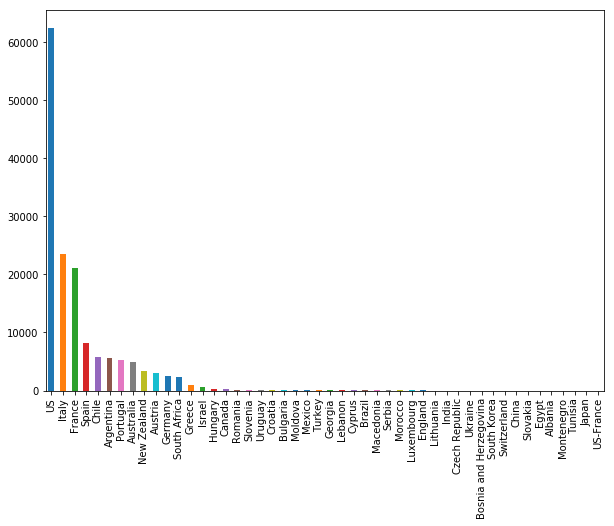

In [158]:
wine['country'].value_counts().plot(kind='bar', figsize=(10,7))
plt.show()

# Dealing with datetime in Pandas
Pandas built off the datetime package in Python to offer a datetime index, and plenty of ways to work with this.
However, it is still far from intuitive. 
That doesn't mean it's not useful, and for anyone doing a timeseries project, you'll need to deal with dates and times in pandas often.

Let's load a sample dataset of datetime energy data and get started!

In [29]:
energy = pd.read_csv('data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)

In [186]:
from datetime import datetime

s = "8 March, 2017"
d = datetime.strptime(s, '%d %B, %Y')
print(d.strftime('%Y-%m-%d'))

2017-03-08


In [187]:
d

datetime.datetime(2017, 3, 8, 0, 0)

In [197]:
(energy.index[-1] - energy.index[0])

Timedelta('732 days 23:00:00')

Note that this data has a DateTimeIndex. 
setting `parse_dates=True` when we read the CSV lets pandas infer this datetimeindex.

In [30]:
energy.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2001-01-01 15:00:00', '2001-01-01 16:00:00',
               '2001-01-01 17:00:00', '2001-01-01 18:00:00',
               '2001-01-01 19:00:00', '2001-01-01 20:00:00',
               '2001-01-01 21:00:00', '2001-01-01 22:00:00',
               '2001-01-01 23:00:00', '2001-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=32896, freq=None)

We can select data points within a specific time range, using the DateTimeIndex and .loc.
Here, we select the first one day of data.

In [31]:
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00', :]

,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0
1998-12-31 06:00:00,29382.0
1998-12-31 07:00:00,31373.0
1998-12-31 08:00:00,33272.0
1998-12-31 09:00:00,34133.0


In [32]:
# One record for each hour of this day.
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00', :].shape[0]

24

## Selecting with boolean indexing on pandas datetimeindex
We can use .dot notation with conditionals to select on specific parts of the datetime, like days or months.

In [33]:
# making a new DF that only includes the month of septmeber from each year.
septembers = energy[energy.index.month == 9]

We can also call just a date, and get all the hours/time periods in that day:

In [168]:
energy.index == '2000-01-03'

array([False, False, False, ..., False, False, False])

In [181]:
energy['2000-01-03']

,PJM_Load_MW
Datetime,
2000-01-03 01:00:00,21557.0
2000-01-03 02:00:00,20464.0
2000-01-03 03:00:00,20057.0
2000-01-03 04:00:00,19988.0
2000-01-03 05:00:00,20463.0
2000-01-03 06:00:00,22228.0
2000-01-03 07:00:00,25780.0
2000-01-03 08:00:00,28369.0
2000-01-03 09:00:00,29126.0


In [178]:
energy[int(energy.index.year) == 2000 & int(energy.index.month)==1 & int(energy.index.day)==3]

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Int64Index'

In [180]:
energy.loc['2000-01-03 00:00:00':'2000-01-04 00:00:00']

,PJM_Load_MW
Datetime,
2000-01-03 01:00:00,21557.0
2000-01-03 02:00:00,20464.0
2000-01-03 03:00:00,20057.0
2000-01-03 04:00:00,19988.0
2000-01-03 05:00:00,20463.0
2000-01-03 06:00:00,22228.0
2000-01-03 07:00:00,25780.0
2000-01-03 08:00:00,28369.0
2000-01-03 09:00:00,29126.0


Same with for a year and month:

In [185]:
month_jan = energy['2000-01'].shape

In [183]:
# We see that it includes one record for each our of each day of the month of January, which has 31 days
assert month_jan[0] == 31*24

## Resampling
We can also combine the data in different ways, and over different time periods.
This means that just because our data is in hourly time periods, we dont have to keep it that way. 

In [198]:
# We can get the average load over a day:
daily_avg_energy = energy.resample('M').mean()
daily_avg_energy.head()

,PJM_Load_MW
Datetime,
1998-04-30,25429.250696
1998-05-31,26766.952957
1998-06-30,29741.420833
1998-07-31,32862.901882
1998-08-31,33179.141129


In [38]:
# We can also get the total MWh used in a day:
daily_energy = energy.resample('D').sum()
daily_energy.columns = ["PJM_Load_MWh"]
daily_energy.head()

,PJM_Load_MWh
Datetime,
1998-04-01,639716.0
1998-04-02,638539.0
1998-04-03,616136.0
1998-04-04,587690.0
1998-04-05,540214.0


## Groupby with DateTimeIndex
Using groupby with a pandas DateTimeIndex can be extremely useful and powerful.
Let's look at how this can work.

In [204]:
index_level_names = ['year', 'month', 'week', 'day']
indexes = [energy.index.year.rename('year'),
           energy.index.month.rename('month'),
           energy.index.week.rename('week'),
           energy.index.day.rename('day')]

aggregated = energy.groupby(indexes).sum()

In [205]:
aggregated

PJM_Load_MW
year month week day             
1998 4     14   1       639716.0
                2       638539.0
                3       616136.0
                4       587690.0
                5       540214.0
           15   6       640312.0
                7       643340.0
                8       636976.0
                9       657606.0
                10      601388.0
                11      553629.0
                12      520249.0
           16   13      612848.0
                14      625467.0
                15      628571.0
                16      636981.0
                17      638903.0
                18      546578.0
                19      542825.0
           17   20      629035.0
                21      634042.0
                22      628072.0
                23      630936.0
                24      622779.0
                25      543137.0
                26      535367.0
           18   27      625078.0
                28      634897.0
                29      635276.0
                30      631615.0
...                          ...
2001 12    48   2       606003.0
           49   3       710945.0
                4       706670.0
                5       688907.0
                6       686148.0
                7       678184.0
                8       659498.0
                9       641953.0
           50   10      754337.0
                11      730539.0
                12      746670.0
                13      728420.0
                14      707053.0
                15      651379.0
                16      676234.0
           51   17      742976.0
                18      730701.0
                19      737949.0
                20      757733.0
                21      760536.0
                22      707654.0
                23      673208.0
           52   24      654200.0
                25      658567.0
                26      743722.0
                27      794222.0
                28      779757.0
                29      721638.0
                30      743012.0
2002 1     1    1        31569.0

[1372 rows x 1 columns]

In [ ]:
df.groupby([df.Date.dt.year.rename('year'), df.Date.dt.month.rename(month')]).mean()

In [40]:
aggregated.head()

PJM_Load_MW
Datetime Datetime Datetime Datetime             
1998     4        14       1            639716.0
                           2            638539.0
                           3            616136.0
                           4            587690.0
                           5            540214.0

The index level names are not particularly helpful here. We can change them.

### Selecting on Multi-Index: Using Slice

In [52]:
energy_2000 = aggregated.loc[(slice(2000,2000), slice(None), slice(None), slice(None)), :]
energy_2000

PJM_Load_MW
year month week day             
2000 1     1    3       656411.0
                4       679531.0
                5       735085.0
                6       770492.0
                7       742633.0
                8       687443.0
                9       639502.0
           2    10      720115.0
                11      726979.0
                12      738382.0
                13      761996.0
                14      849317.0
                15      771195.0
                16      686555.0
           3    17      870363.0
                18      923068.0
                19      862246.0
                20      837918.0
                21      894751.0
                22      849900.0
                23      786532.0
           4    24      810824.0
                25      832855.0
                26      825895.0
                27      890353.0
                28      902885.0
                29      797872.0
                30      779430.0
           5    31      807775.0
           52   1       629453.0
...                          ...
     12    48   2       721921.0
                3       737315.0
           49   4       808052.0
                5       795625.0
                6       822509.0
                7       819908.0
                8       799906.0
                9       733578.0
                10      725652.0
           50   11      778092.0
                12      773580.0
                13      835876.0
                14      808279.0
                15      788230.0
                16      739383.0
                17      667204.0
           51   18      823409.0
                19      840330.0
                20      854956.0
                21      864708.0
                22      831316.0
                23      830087.0
                24      755419.0
           52   25      764130.0
                26      834687.0
                27      841897.0
                28      843363.0
                29      840427.0
                30      780665.0
                31      755509.0

[366 rows x 1 columns]

Or, say we want to know what Christmas week looked like across all the years for which we have data..

In [55]:
energy_christmas = aggregated.loc[(slice(None), slice(None), slice(52,52), slice(None)), :]

You can also then use a groupby again!

Note that here, we're using a groupby on the index level.

In [208]:
energy_christmas.groupby(level='year').sum()

,PJM_Load_MW
year,
1998,4969134.0
1999,3692395.0
2000,6884104.0
2001,5095118.0


Now, we can plot by these levels!

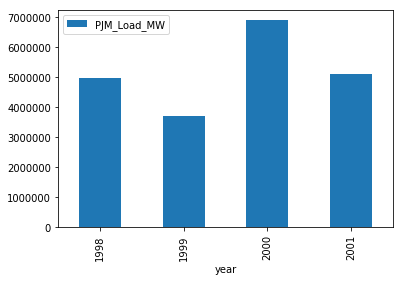

In [61]:
energy_christmas.groupby(level=0).sum().plot(kind='bar')
plt.show()

**Question:** See what just writing "52" in the slice box does.

**Question**: Select Christmas week, but only for years 1998-2000.

## Exercise:
- Find the week (and its associated year) with the highest total weekly consumption.

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?

In [244]:
weekly = energy.resample('W').sum()

In [246]:
energy.resample('W').sum().sort_values(by='PJM_Load_MW', ascending=False).index[0]

Timestamp('2001-08-12 00:00:00')

In [ ]:
energy.loc

In [248]:
weekly

,PJM_Load_MW
Datetime,
1998-04-05,3022295.0
1998-04-12,4253500.0
1998-04-19,4232173.0
1998-04-26,4223368.0
1998-05-03,4232743.0
1998-05-10,4283860.0
1998-05-17,4461340.0
1998-05-24,4635687.0
1998-05-31,4827849.0


In [247]:
weekly.loc['2001-08-12']

PJM_Load_MW    6871225.0
Name: 2001-08-12 00:00:00, dtype: float64

In [228]:
energy.groupby([energy.index.year, energy.index.week]).sum().sort_values(by='PJM_Load_MW', ascending=False).index[0]

(2000, 52)

In [240]:
energy.groupby([energy.index.year, energy.index.week]).sum().sort_values(by='PJM_Load_MW', ascending=False)

PJM_Load_MW
Datetime Datetime             
2000     52          6884104.0
2001     32          6871225.0
1999     30          6575282.0
         29          6438367.0
2001     1           6388378.0
         26          6319915.0
1999     27          6260002.0
         26          6186932.0
1998     35          6110588.0
2000     32          6035280.0
         3           6024778.0
1998     30          6006396.0
2001     30          5934283.0
         33          5914240.0
1999     31          5856307.0
2000     4           5840114.0
         35          5838460.0
2001     24          5834248.0
2000     31          5829594.0
         51          5800225.0
1999     32          5798758.0
1998     29          5765515.0
2001     25          5750563.0
         35          5738328.0
         34          5730452.0
1998     26          5725681.0
2001     31          5724720.0
1999     28          5673732.0
2000     26          5670575.0
         25          5635493.0
...                        ...
1999     41          4424835.0
         20          4420190.0
2000     17          4399747.0
1998     23          4399672.0
2001     22          4381909.0
1998     49          4379819.0
1999     15          4368814.0
         16          4362828.0
2001     15          4360680.0
1998     44          4331813.0
         41          4319792.0
1999     14          4318818.0
1998     43          4307971.0
1999     18          4291642.0
1998     19          4283860.0
         42          4276822.0
1999     19          4276387.0
         47          4267324.0
1998     48          4259010.0
         15          4253500.0
         18          4232743.0
         16          4232173.0
         17          4223368.0
1999     17          4188958.0
         13          4188745.0
         52          3692395.0
1998     14          3022295.0
         53          2988571.0
1999     53          2178806.0
2002     1             31569.0

[198 rows x 1 columns]

In [251]:
day_of_week = energy.groupby(energy.index.weekday).mean()
day_of_week.sort_values(by='PJM_Load_MW', ascending=False).index[0]

# 1 = Tuesday.

1

In [253]:
day_of_week

,PJM_Load_MW
Datetime,
0,30531.307611
1,31106.903226
2,31042.408463
3,30816.562713
4,30422.713010
5,27693.494048
6,26753.303876


In [249]:
time_of_day = energy.groupby(energy.index.hour).mean()
time_of_day.sort_values(by='PJM_Load_MW', ascending=True).index[0]

4

In [252]:
time_of_day = energy.groupby([energy.index.year, energy.index.hour]).mean()
time_of_day.groupby(level=0).idxmin()

,PJM_Load_MW
Datetime,
1998,"(1998, 4)"
1999,"(1999, 4)"
2000,"(2000, 4)"
2001,"(2001, 4)"
2002,"(2002, 0)"


In [231]:
energy.groupby(energy.index.year).mean()
# it's increasing

,PJM_Load_MW
Datetime,
1998,28761.826436
1999,29642.061772
2000,30114.333182
2001,30298.447933
2002,31569.000000


In [233]:
avg_monthly_consumption

,PJM_Load_MW
Datetime,
1,31943.791312
2,30577.296569
3,28898.505824
4,26104.898087
5,26983.842742
6,31703.028125
7,33573.780242
8,34012.357191
9,29433.188542


In [237]:
avg_monthly_consumption = energy.groupby(energy.index.month).mean()
april_consump = avg_monthly_consumption.loc[4]
june_consump = avg_monthly_consumption.loc[6]

percent_diff = ((june_consump - april_consump) / april_consump ) * 100

print('April consumption average is:', int(april_consump))
print('June consumption average is:', int(june_consump))
print('Percentage Difference in consumption average is:', int(percent_diff))

April consumption average is: 26104
June consumption average is: 31703
Percentage Difference in consumption average is: 21
